# Week 8. Interactions between independent variables

### By Hyunsu Oh and Charlie Eaton

## 1. An example of interactions:

* which are the dependent (DV) and independent variables (IVs)?
* why does the DV have an interactive relationship to the IVs?

<img src="abortioninteraction.jpeg" width="600" align="left">

## 2. Interactions involving nominal independent variables

    A. Develop a hypothesis about whether income (DV) is or is not interactively associated with race (IV) and sex (IV)
    
    B. State the direction of the associations you predict for EACH independent variable (IV)
    
    C. Our hypotheses are constrained by sex being measured only as male/female and race only being measured as white/black/other
    
    D. Use the code below to test your hypotheses visually

(Your hyphothesis here)

Set your graph format and install the 538 scheme

In [6]:
%set graph_format svg

In [3]:
*ssc install g538schemes
set more off
use "GSS2018w8", clear
gen age2=age^2
ds




(7 missing values generated)

age       paeduc    race      realrinc  age2
educ      sex       yearsjob  PASEI10


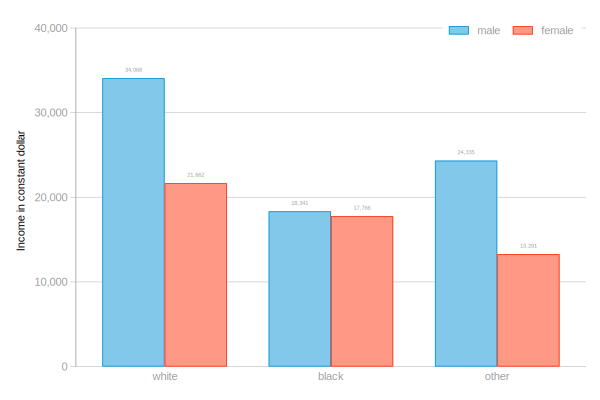

In [16]:
graph bar realrinc, over(sex) over(race) asyvars ytitle (Income in constant dollar) ///
  blabel(bar, format(%7.0fc)) legend(rows(1) position(1) ring(0)) scheme(538w)

### Do the results in the graph support or contradict your hypothesis?

## 3. Interaction estimates with nomominal variables in regression

    A. Interaction estimates add independent variables (IVs) to the model that multiply the interactive variables by each other:
    
$ \hat{Y} = \alpha_{1} + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}(x_1\cdot x_2) $

    B. We do this with dummy variables for nominal IVs:
    
$ \hat{Y} = \alpha_{1} + \beta_{1}D_{x1,2} + \beta_{2}D_{x2,2} + \beta_{2}D_{x2,3}$
    
    There are multiple ways to do this in Stata:

In [4]:
quietly {
set line 140
*Method number 1
gen white= race==1
gen black= race==2
gen female= sex==2
gen whitexfemale = white * female
gen blackxfemale = black * female

*Method number 2
xi i.race*i.sex, noomit
}
*Compare the 2 methods
list race sex white _Irace_1 black _Irace_2 female _Isex_2 whitexfemale _IracXsex_1_2 blackxfemale _IracXsex_2_2 if _n<13



. list race sex white _Irace_1 black _Irace_2 female _Isex_2 whitexfemale _IracXsex_1_2 blackxfemale _IracXsex_2_2 if _n<13

      +---------------------------------------------------------------------------------------------------------------------+
      |  race      sex   white   _Irace_1   black   _Irace_2   female   _Isex_2   whitex~e   _Ira~1_2   blackx~e   _Ira~2_2 |
      |---------------------------------------------------------------------------------------------------------------------|
   1. | white     male       1          1       0          0        0         0          0          0          0          0 |
   2. | white   female       1          1       0          0        1         1          1          1          0          0 |
   3. | white     male       1          1       0          0        0         0          0          0          0          0 |
   4. | white   female       1          1       0          0        1         1          1          1          0     

### There's no need to create new variables before regression

Instead, we can use the following syntax to say we want to interact dummies for the 2 nominal variables:

**--i.var1##i.var2--**

This code will include both the uninteracted dummies and the interacted dummies (minus omitted categories)

Edit the second regression equation below to regress both the uninteracted dummies and the interacted dummies

In [151]:
est clear
quietly eststo: reg realrinc i.race i.sex age age2
quietly eststo: reg realrinc i.race##i.sex age age2

### Then output the 2 models using the esttab code below and lets compare

In [156]:
%html
esttab, stats(r2 N, labels("R2" "N") fmt(%10.2fc %10.0fc)) cells(b(star fmt(%10.0fc)) se(fmt(%6.0fc) par) N (fmt(%10.0fc)) r2 (fmt(%10.2f))) ///
  nobase noconstant starlevels(* .1 ** .05 *** .01) mlabels("Model 1" "Model 2") drop(age age2 _cons)  ///
  coeflabels (2.race "Black" 3.race "Other" 2.sex "Female" 2.race#2.sex "Black female" /// 
  3.race#2.sex "Other female")  html

This front-end or document format cannot display HTML

### It is confusing to interpret the combined coefficients of interaction terms

    A. To estimate the predicted effect on income (DV) of being female (IV) for Black survey respondents, we have to add coefficients:

$ \beta_{2}D_{female} + \beta_{3}D_{black*female}$

= -12,534 + 13,325 = 791 compared to a -12,534 effect of being female for whites

    B. To estimate the effect on income (DV) of being black (IV) among women, we have to do a similar procedure.

    C. The surprising direction of race for women and of sex for black respondents suggests we are doing something wrong, let's log income moving forward

## 4. The **--margins--** / regression adjusted redictions are clearer

--margins-- gives us estimated income across nominal categories if other covariates are held constant at their means:





  Variables that uniquely identify margins: sex race


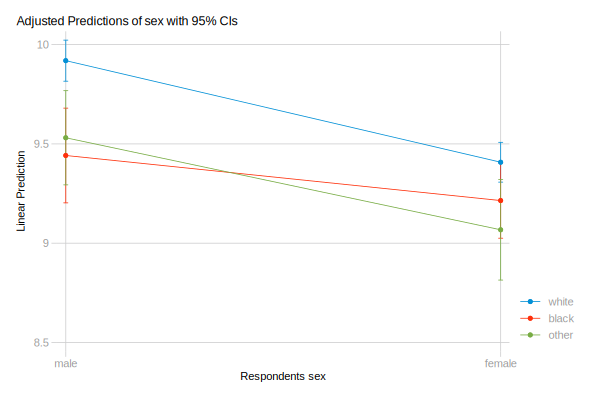






  Variables that uniquely identify margins: race sex


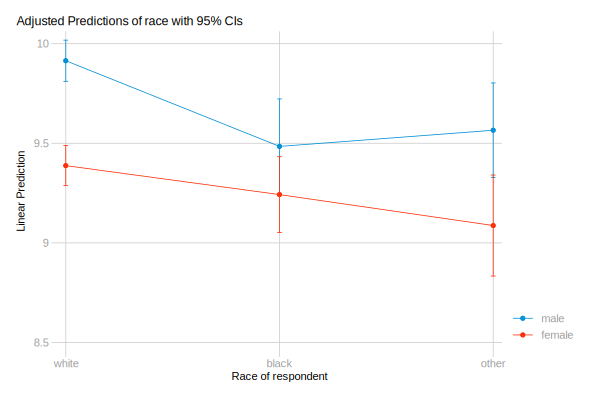

In [8]:
*gen realrincln=log(realrinc)
quietly eststo: reg realrincln i.race##i.sex age age2
quietly margins i.sex, over(race) atmeans
marginsplot, scheme(538w)

quietly eststo: reg realrincln i.race##i.sex age age2 
quietly margins i.race, over(sex) atmeans
marginsplot, scheme(538w)

## 5. Interactions of interval ratio variables with each other and with nominal variables

    A. Consider the possibility of an interation effect on income (DV) involving education (IV) and race (IV)
    
    B. Do you think the effect on income (DV) of education (IV) will differ across race (IV)? Do you think the effect of race (IV) will differ across education (IV)?
    
    C. Write your predictions as hypotheses
    
  

### Procedures for interacting interval ration variables with nominal variables:

A. No dummy variables are involved with interval ratio variables
    
B. So the regression equation for 2 interacted interval ratio variables (IVs) is just:
    
$ \hat{Y} = \alpha_{1} + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}(x_1\cdot x_2) $

C. The equation for interacting 1 interval ratio variable with 1 nominal variable is:
    
$ \hat{Y} = \alpha_{1} + \beta_{1}x_1 + \beta_{2}D_{x2,2} + \beta_{3}D_{x2,2}\cdot x_1 $

D. In Stata, we write this using the **--##--** syntax together with c.var1 to tell Stata that an interacted variable is continuous. Complete the following code to do this:

In [9]:
est clear

quietly eststo: reg realrincln i.race educ age age2
quietly eststo: reg realrincln i.race##c.educ age age2

In [163]:
%html
esttab, html noconstant stats(r2 N, labels("R2" "N") fmt(%10.2fc %10.0fc)) cells(b(star fmt(%10.2fc)) se(fmt(%6.2fc) par)) ///
  nobase starlevels(* .1 ** .05 *** .01) mlabels("Model 1" "Model 2") drop(age age2 _cons) ///
  coeflabels (2.race "Black" 3.race "Other" educ "Years of education" ///
  2.race#c.educ "Black * education" 3.race#c.educ "Other * education")  

This front-end or document format cannot display HTML

### Back to margins

    A. This time, we want to estimate differences in income between racial groups and educational levels
    
    B. To do this, we use the **--at(var1(0(i)max)--** syntax to specify the education levels we want estimates for




  Variables that uniquely identify margins: educ race


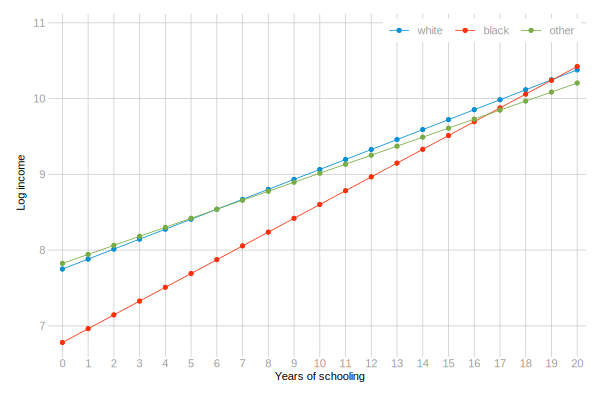

In [10]:
quietly margins race, at(educ=(0(1)20)) atmeans
marginsplot, noci legend(on) title("") subtitle("") xtitle("Years of schooling") ///
  ytitle("Log income") legend(rows(1) position(1) ring(0)) scheme(538w)

### How would you interpret the above graph?

## 6. Interactions between continuous variables

    A. Consider the effects on logged income (DV) of age (IV) and (time in current job)
    
    B. How do you think the effect of time on the job might change as age changes?
    
    C. Express your prediction as a hypothesis
    
    D. Look at the distributions below as scatter plots

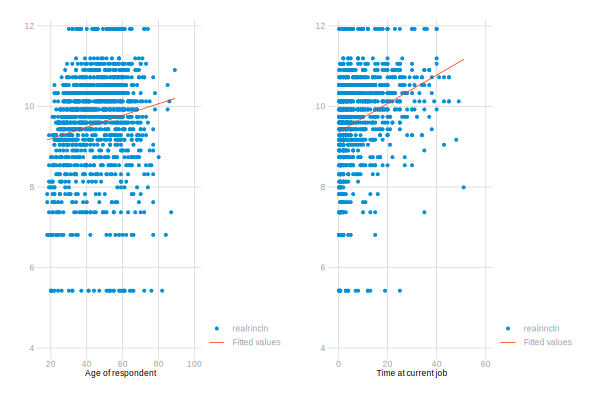

In [24]:
quietly twoway (scatter realrincln age) (lfit realrincln age), name(age, replace) scheme(538w)
quietly twoway (scatter realrincln yearsjob) (lfit realrincln yearsjob), name(yearsjob, replace) scheme(538w)
  graph combine age yearsjob, scheme(538w)

### Estimate models with an interaction and some controls

In [43]:
est clear

quietly eststo: reg realrincln age yearsjob educ i.race i.sex
quietly eststo: reg realrincln c.yearsjob##c.age educ i.race i.sex

In [44]:
%html
esttab, stats(r2 N, labels("R2" "N")) cells(b(star fmt(3)) se(fmt(3) par)) ///
  nobase noconstant starlevels(* .1 ** .05 *** .01) mlabels("Model 1" "Model 2") drop(_cons educ 2.race 3.race 2.sex) ///
  coeflabels (age "Age" yearsjob "Work experience" c.age#c.yearsjob "Age * work experience") html

This front-end or document format cannot display HTML

### How could you interpret the negative interaction term?

### Visualize with marginsplot




  Variables that uniquely identify margins: yearsjob age


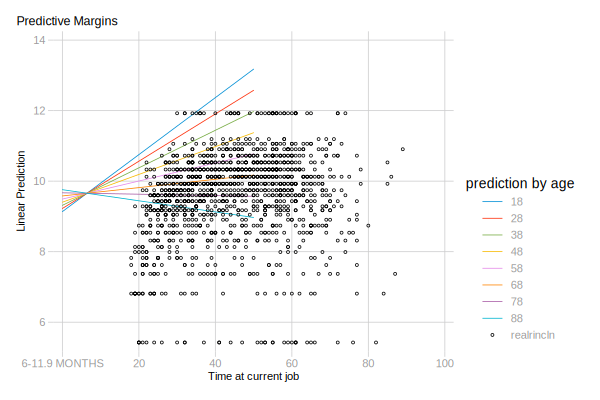

In [57]:
quietly margins, at(yearsjob=(0(10)55) age=(18(10)90)) vsquish
marginsplot, noci x(yearsjob) recast(line) addplot(scatter realrincln age, m(oh)) xlabel(20(10)90) scheme(538w) legend(title(prediction by age))